# Softmax Regression Implementation from Scratch

## Importing Necessary Libraries

In [1]:
import numpy as np                                # To handle numbers
import matplotlib.pyplot as plt                   # Visualizing data entries

## Importing Dataset

In [2]:
from sklearn import datasets
digits = datasets.load_digits()
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))         # 1797 pictures of handwritten digits in a 8*8 pixel shape
y = digits.target                                  # 1797 

## Visualizing First Ten Digits in the Dataset

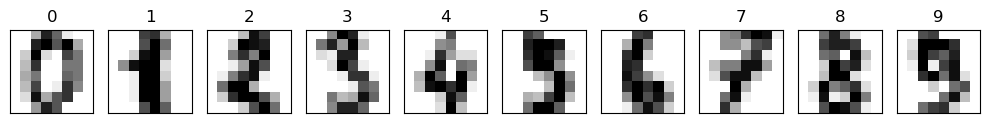

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=10, figsize=(10, 6), subplot_kw={'xticks': [], 'yticks': []})
for i in range(10):
    axes[i].imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation="nearest")
    axes[i].set_title(y[i])
fig.tight_layout()
plt.show()

## Converting Data Labels to Binary Probabilities

In [4]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer(sparse_output=False)
y = lb.fit_transform(y)

## Splitting the Dataset into the Train, Cross Validation and Test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_, y_train, y_ = train_test_split(X, y, test_size = 0.40, random_state = 42)
X_CV, X_test, y_CV, y_test = train_test_split(X_, y_, test_size = 0.50, random_state = 42)

## Defining the Softmax Regression Class

In [6]:
class CustomSoftmaxRegression():

    def __init__(self, max_iter = 1000, learning_rate = 0.01):
        
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.weights = None
        self.bias = None
        
    def fit(self, X, y):
        
        n_samples, n_features = X.shape
        n_classes = y.shape[1]
        self.weights = np.zeros((n_classes, n_features))
        self.bias = np.zeros(n_classes)
        
        for i in range(0, self.max_iter):
            weighted_sum = np.dot(X, self.weights.T) + self.bias
            h_theta = self._softmax(weighted_sum)
            self.gradient_descent(y, h_theta, X, n_samples)
                
    def predict(self, inputs):
        
        prob_list = self._softmax(np.dot(inputs, self.weights.T) + self.bias)
        return np.array([[1 if x == max(sample) else 0 for x in sample] for sample in prob_list])
        
    def _softmax(self, x):
        
        a = np.zeros(x.shape)
        for i in range(0, x.shape[0]):
            for j in range(0, x.shape[1]):
                a[i,j] = np.exp(x[i,j]) / np.sum(np.exp(x[i]))
        return a
    
    
    def gradient_descent(self, y, h_theta, X, n_samples):
        
        self.weights = self.weights - self.learning_rate * (-1 / n_samples) * np.dot((y - h_theta).T, X)
        self.bias = self.bias - self.learning_rate * (-1 / n_samples) * np.sum(y - h_theta)
        

## Create an Instance of CustomSoftmaxRegression

In [7]:
sr = CustomSoftmaxRegression()

## Train the model

In [8]:
sr.fit(X_train, y_train)

## Make predictions on the CV and test set

In [9]:
y_train_pred = sr.predict(X_train)
y_CV_pred = sr.predict(X_CV)
y_test_pred = sr.predict(X_test)

## Converting Binary Probabilities Back to Actual Labels

In [10]:
y_train = lb.inverse_transform(y_train)
y_train_pred = lb.inverse_transform(y_train_pred)
y_CV = lb.inverse_transform(y_CV)
y_CV_pred = lb.inverse_transform(y_CV_pred)
y_test = lb.inverse_transform(y_test)
y_test_pred = lb.inverse_transform(y_test_pred)

## Evaluate the model and display the confusion matrix

Training set accuracy         % 99.72170686456401
Cross validation set accuracy % 96.37883008356546
Test set accuracy             % 97.77777777777777


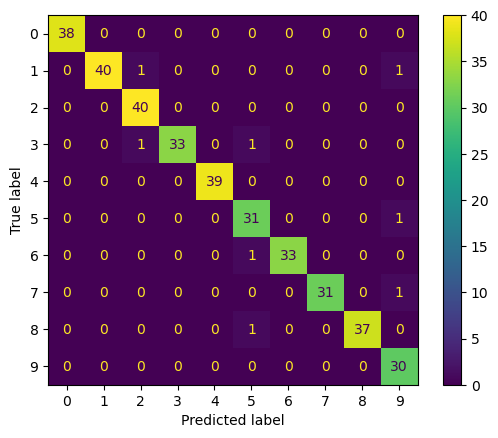

In [11]:
from sklearn import metrics
print("Training set accuracy         %", metrics.accuracy_score(y_train, y_train_pred) * 100)
print("Cross validation set accuracy %", metrics.accuracy_score(y_CV, y_CV_pred) * 100)
print("Test set accuracy             %", metrics.accuracy_score(y_test, y_test_pred) * 100)

cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(cm)
disp.plot()

plt.show()